### Decision Tree - Label Classification

In [31]:
import sys
sys.path.append('../../')

# Import libraries
from utils.load import load
from utils.score import fold_cross_validate, visualize_classification_result, visualize_feature_importance
from utils.print import print_cross_validation_scores, print_scores
from constant.columns import FEATURES, LABEL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [32]:
# Import data
df = pd.read_csv('./source/dataset.csv')
X, y = df[FEATURES], df[LABEL]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#### Cross Validation

In [33]:
# Define the model
clf_cv = DecisionTreeClassifier()
scores = fold_cross_validate(clf_cv, X, y)

# Print scores
print_cross_validation_scores(scores)

MACRO:
Precision: 0.6341 (0.0939)
Recall: 0.6333 (0.0776)
F1 score: 0.6282 (0.0859)
---------------------------------
MICRO:
Precision: 0.9107 (0.0235)
Recall: 0.9107 (0.0235)
F1 score: 0.9107 (0.0235)


#### Feature Importance

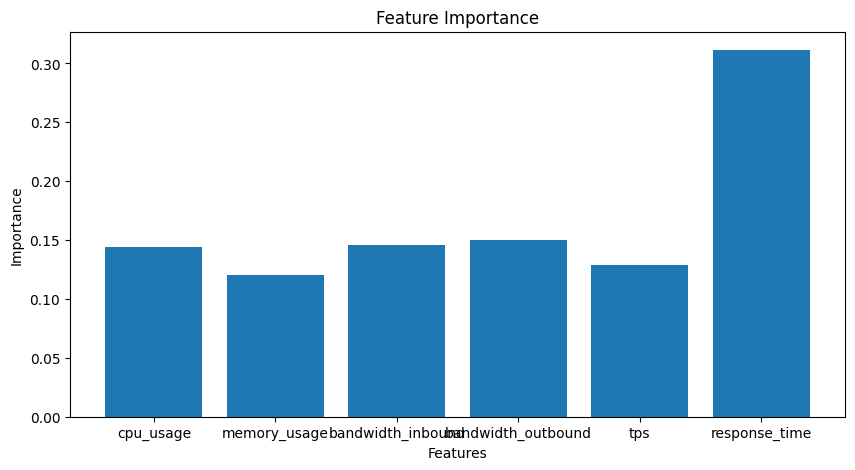

In [34]:
# Create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Get the feature importances
importance = clf.feature_importances_
visualize_feature_importance(importance, FEATURES)

#### Train Model

In [35]:
# Create and train the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
# Predict and print the score
y_pred = clf.predict(X_test)
print_scores(y_test, y_pred)

Accuracy: 0.9333333333333333
Precision: 0.5909090909090909
Recall: 0.5416666666666666
F1: 0.5652173913043478


#### Visualize Result

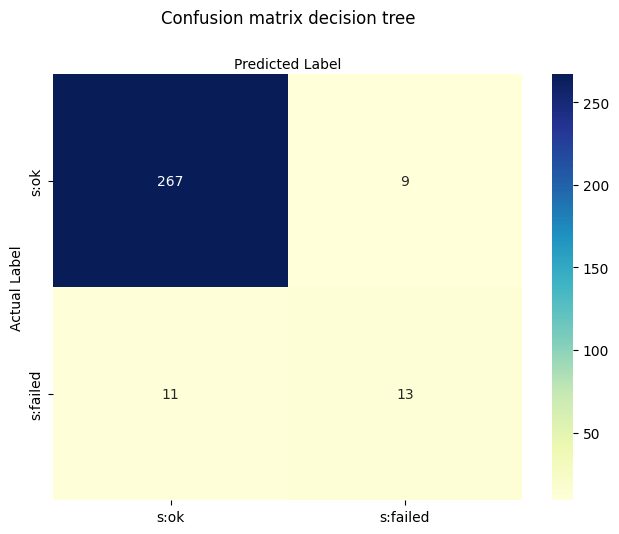

In [37]:
visualize_classification_result(y_test, y_pred)